In [721]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sklearn.feature_selection
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
import io
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score,classification_report, confusion_matrix
% matplotlib inline
sns.set()

In [722]:
traindata = pd.read_csv('loan-train.csv')

In [723]:
traindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [724]:
#Loan Status = Y represents performing loans
#Loan Status = N represents non-performing loans

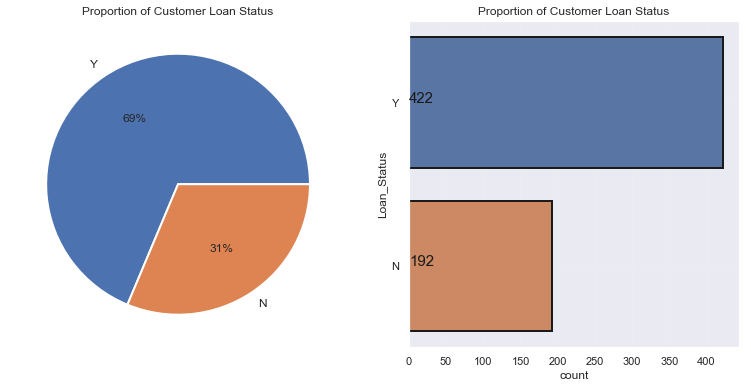

In [725]:
plt.figure(figsize=(13,6))
plt.subplot(121)
traindata["Loan_Status"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 12,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Proportion of Customer Loan Status")
plt.ylabel("")

plt.subplot(122)
ax = sns.countplot(y = traindata["Loan_Status"],linewidth = 2,
                   edgecolor = "k"*traindata["Loan_Status"].nunique())
for i,j in enumerate(traindata["Loan_Status"].value_counts().values) : 
    ax.text(.1,i,j,fontsize = 15,color = "k")
plt.title("Proportion of Customer Loan Status")
plt.grid(True,alpha = .1)
    
plt.show()

In [726]:
traindata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [727]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [728]:
traindata.duplicated().sum()

0

In [729]:
traindata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [730]:
traindata.Gender.mode()

0    Male
dtype: object

In [731]:
train_data = traindata

In [732]:
train_data.Gender.fillna('Male', inplace = True)

In [733]:
train_data.Gender.isnull().sum()

0

In [734]:
traindata.Married.mode()

0    Yes
dtype: object

In [735]:
train_data.Married.fillna('Yes', inplace = True)

In [736]:
train_data.Married.isnull().sum()

0

In [737]:
traindata.Dependents.mode()

0    0
dtype: object

In [738]:
train_data.Dependents.fillna('0', inplace = True)

In [739]:
train_data.Married.isnull().sum()

0

In [740]:
traindata.Self_Employed.mode()

0    No
dtype: object

In [741]:
train_data.Self_Employed.fillna('No', inplace = True)
train_data.Married.isnull().sum()

0

In [742]:
traindata.LoanAmount.mean()

146.41216216216216

In [743]:
train_data.LoanAmount.fillna(146.41, inplace = True)
train_data.LoanAmount.isnull().sum()

0

In [744]:
traindata.Loan_Amount_Term.mean()

342.0

In [745]:
train_data.Loan_Amount_Term.fillna(342.20, inplace = True)
train_data.Loan_Amount_Term.isnull().sum()

0

In [746]:
traindata.Credit_History.mode()

0    1.0
dtype: float64

In [747]:
train_data.Credit_History.fillna(1.0, inplace = True)
train_data.Credit_History.isnull().sum()

0

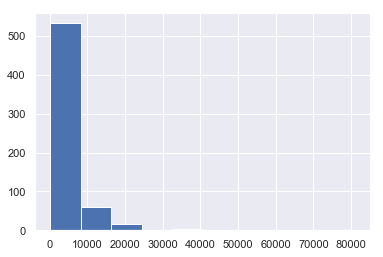

In [748]:
train_data['ApplicantIncome'].hist()
plt.show()

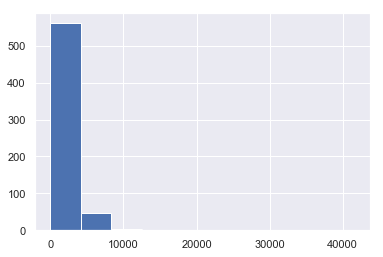

In [749]:
train_data['CoapplicantIncome'].hist()
plt.show()

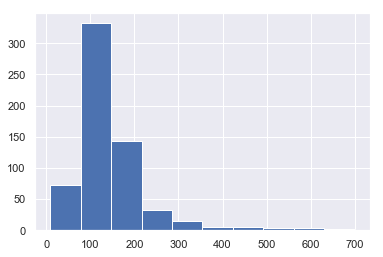

In [750]:
train_data['LoanAmount'].hist()
plt.show()

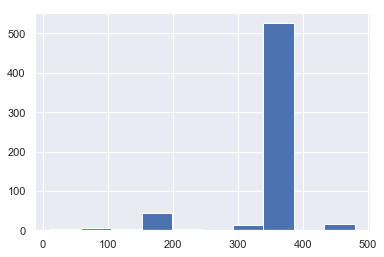

In [751]:
train_data['Loan_Amount_Term'].hist()
plt.show()

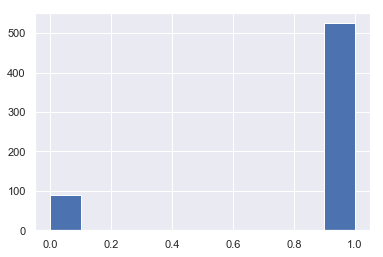

In [752]:
train_data['Credit_History'].hist()
plt.show()

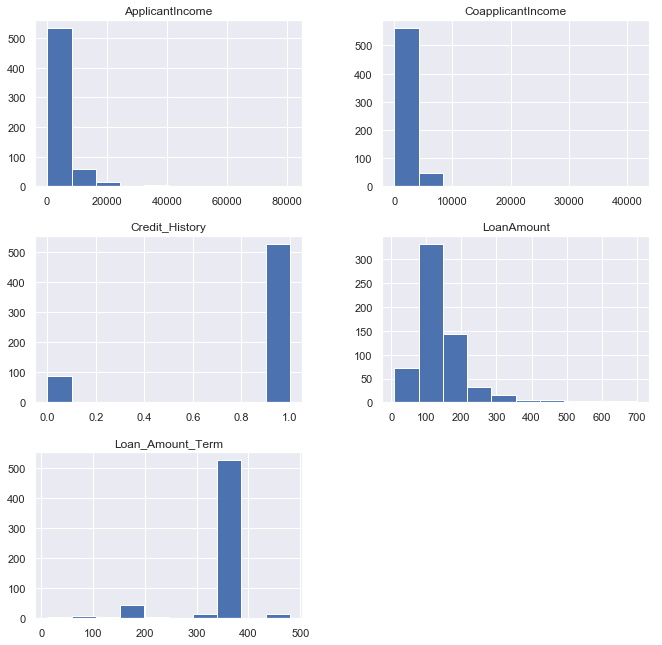

In [753]:
#Try to plot these variables in a chart to see their spread, a quick check for skeweness in the data

train_data[train_data.dtypes[(train_data.dtypes=="float64")|(train_data.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
plt.show()

In [754]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412085,342.004560,0.855049
std,6109.041673,2926.248369,84.037468,64.372496,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [755]:
Income_Band_new = []
for ApplicantIncome in train_data['ApplicantIncome']:
    if ApplicantIncome >=0 and ApplicantIncome <=3200:
        Income_Band_new.append('Low Inc')
    elif ApplicantIncome >3200 and ApplicantIncome <= 5404:
        Income_Band_new.append('Mid Inc')
    elif ApplicantIncome >5404 and ApplicantIncome <= 10000:
        Income_Band_new.append('High Inc')
    else:
        Income_Band_new.append('Very High Inc')

train_data['Income_Band_new'] = np.asarray(Income_Band_new)

In [756]:
train_data['Income_Band_new'] = Income_Band_new

In [757]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Band_new
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y,High Inc
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N,Mid Inc
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y,Low Inc
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y,Low Inc
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y,High Inc


In [758]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Income_Band_new      614 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 67.2+ KB


In [759]:
new = traindata.sort_values(by = 'ApplicantIncome', ascending=1)

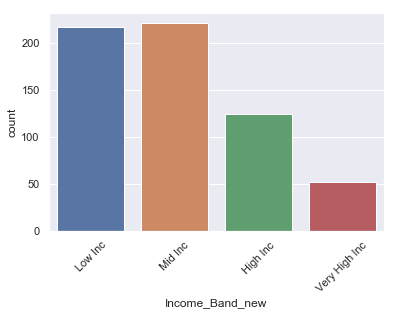

In [760]:
ax=sns.countplot(x = 'Income_Band_new', data = traindata.sort_values(by ='ApplicantIncome'))

plt.setp(ax.get_xticklabels(), rotation=45);

In [761]:
train_data.sort_values(by = 'LoanAmount', ascending=0)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Band_new
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,Very High Inc
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y,Very High Inc
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,Very High Inc
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y,Very High Inc
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N,Very High Inc
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N,Very High Inc
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y,Very High Inc
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,High Inc
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y,Very High Inc
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N,Very High Inc


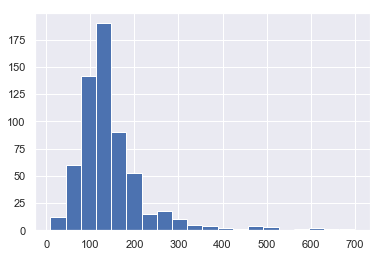

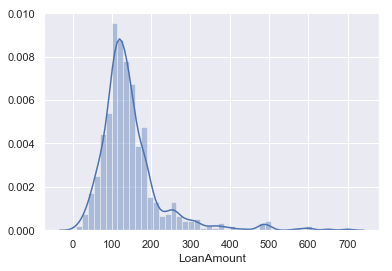

In [762]:
train_data['LoanAmount'].hist(bins=20)
plt.show()

sns.distplot(train_data['LoanAmount'])
plt.show()

In [763]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])

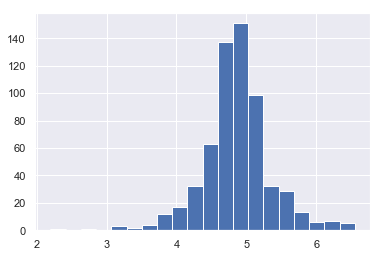

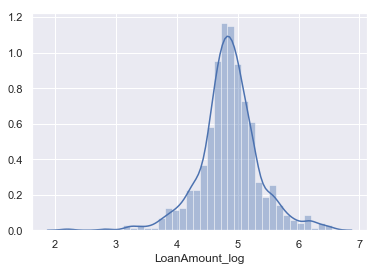

In [764]:
train_data['LoanAmount_log'].hist(bins=20)
plt.show()
sns.distplot(train_data['LoanAmount_log'])
plt.show()

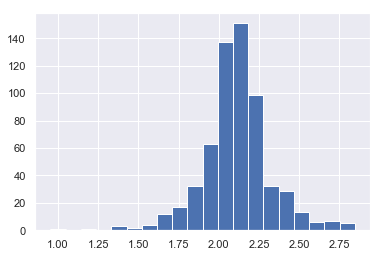

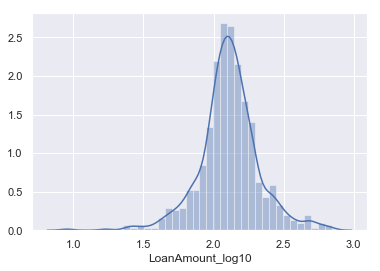

In [765]:
train_data['LoanAmount_log10'] = np.log10(train_data['LoanAmount'])
train_data['LoanAmount_log10'].hist(bins=20)
plt.show()
sns.distplot(train_data['LoanAmount_log10'])
plt.show()

In [766]:
train_data['TotalIncome'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']

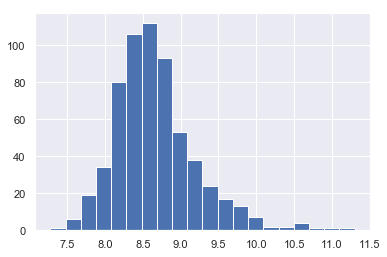

In [767]:
train_data['TotalIncome_log'] = np.log(train_data['TotalIncome'])
train_data['TotalIncome_log'].hist(bins=20)
plt.show()

In [768]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Band_new,LoanAmount_log,LoanAmount_log10,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y,High Inc,4.986411,2.165571,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N,Mid Inc,4.852030,2.107210,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y,Low Inc,4.189655,1.819544,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y,Low Inc,4.787492,2.079181,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y,High Inc,4.948760,2.149219,6000.0,8.699515


In [769]:
train_data.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [770]:
gender_cat = pd.get_dummies(train_data, columns = ['Gender'], drop_first = False)
gender_cat.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Band_new,LoanAmount_log,LoanAmount_log10,TotalIncome,TotalIncome_log,Gender_Female,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y,High Inc,4.986411,2.165571,5849.0,8.674026,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N,Mid Inc,4.852030,2.107210,6091.0,8.714568,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y,Low Inc,4.189655,1.819544,3000.0,8.006368,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y,Low Inc,4.787492,2.079181,4941.0,8.505323,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y,High Inc,4.948760,2.149219,6000.0,8.699515,0,1


In [771]:
gender_cat.Gender_Female.value_counts()

0    502
1    112
Name: Gender_Female, dtype: int64

In [772]:
gender_cat.Gender_Male.value_counts()

1    502
0    112
Name: Gender_Male, dtype: int64

In [773]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Band_new', 'LoanAmount_log', 'LoanAmount_log10', 'TotalIncome',
       'TotalIncome_log'],
      dtype='object')

In [774]:
train_New = pd.get_dummies(train_data, columns = ['Gender', 'Married','Dependents', 'Education',
                                               'Self_Employed','Property_Area','Income_Band_new'], drop_first = True)

In [775]:
train_New.shape

(614, 23)

In [776]:
train_New.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,LoanAmount_log10,TotalIncome,...,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_Band_new_Low Inc,Income_Band_new_Mid Inc,Income_Band_new_Very High Inc
0,LP001002,5849,0.0,146.41,360.0,1.0,Y,4.986411,2.165571,5849.0,...,0,0,0,0,0,0,1,0,0,0
1,LP001003,4583,1508.0,128.00,360.0,1.0,N,4.852030,2.107210,6091.0,...,1,0,0,0,0,0,0,0,1,0


In [777]:
train_New.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'LoanAmount_log10', 'TotalIncome', 'TotalIncome_log', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Income_Band_new_Low Inc', 'Income_Band_new_Mid Inc',
       'Income_Band_new_Very High Inc'],
      dtype='object')

In [778]:
feature_columns = train_New[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log',
       'TotalIncome', 'TotalIncome_log','LoanAmount_log10',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 
       'Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban', 'Property_Area_Urban',
        'Income_Band_new_Low Inc','Income_Band_new_Mid Inc', 'Income_Band_new_Very High Inc']]

In [779]:
feature_columns.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,LoanAmount_log10,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_Band_new_Low Inc,Income_Band_new_Mid Inc,Income_Band_new_Very High Inc
0,5849,0.0,146.41,360.0,1.0,4.986411,5849.0,8.674026,2.165571,1,...,0,0,0,0,0,0,1,0,0,0
1,4583,1508.0,128.00,360.0,1.0,4.852030,6091.0,8.714568,2.107210,1,...,1,0,0,0,0,0,0,0,1,0
2,3000,0.0,66.00,360.0,1.0,4.189655,3000.0,8.006368,1.819544,1,...,0,0,0,0,1,0,1,1,0,0
3,2583,2358.0,120.00,360.0,1.0,4.787492,4941.0,8.505323,2.079181,1,...,0,0,0,1,0,0,1,1,0,0
4,6000,0.0,141.00,360.0,1.0,4.948760,6000.0,8.699515,2.149219,1,...,0,0,0,0,0,0,1,0,0,0


In [780]:
target = train_New[['Loan_Status']]
target.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


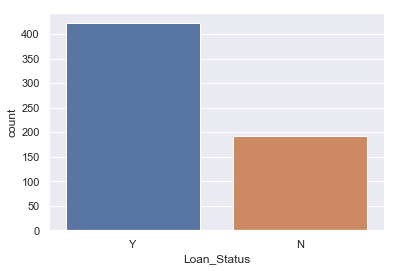

In [781]:
sns.countplot(x='Loan_Status',data=train_New);

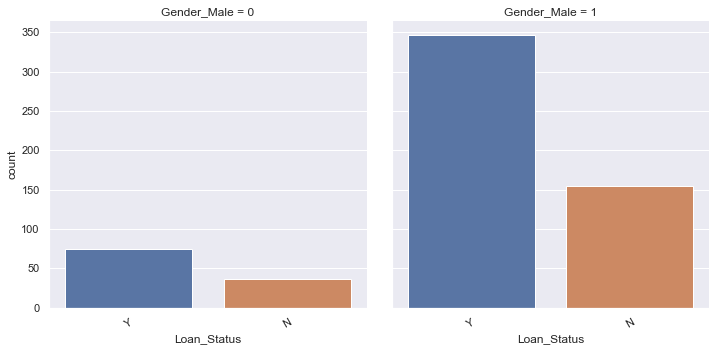

In [782]:
sns.factorplot(x='Loan_Status', col='Gender_Male', kind='count', data=train_New ).set_xticklabels(rotation=30);

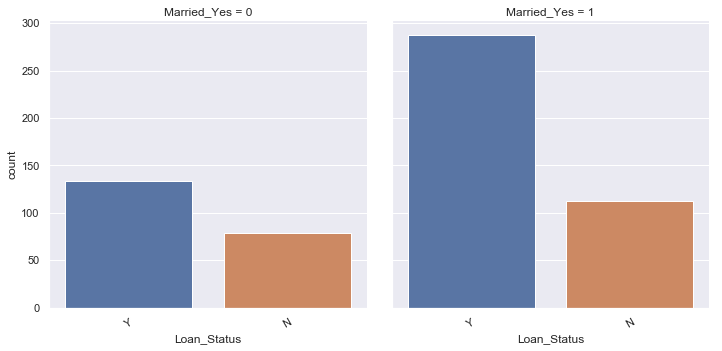

In [783]:
sns.factorplot(x='Loan_Status', col='Married_Yes', kind='count', data=train_New ).set_xticklabels(rotation=30);

In [784]:
K_Best=sklearn.feature_selection.SelectKBest(k=8)
selected_features=K_Best.fit(feature_columns,target)
indices_selected=selected_features.get_support(indices=True)
chosen_cols=[feature_columns.columns[i] for i in indices_selected]

In [785]:
chosen_cols

['CoapplicantIncome',
 'Credit_History',
 'LoanAmount_log',
 'Married_Yes',
 'Dependents_2',
 'Education_Not Graduate',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [786]:
X = train_New[chosen_cols]

In [787]:
X.head(2)

,CoapplicantIncome,Credit_History,LoanAmount_log,Married_Yes,Dependents_2,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,4.986411,0,0,0,0,1
1,1508.0,1.0,4.852030,1,0,0,0,0


In [788]:
y = target['Loan_Status']

In [789]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [790]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [791]:
X_train.shape

(368, 8)

In [792]:
X_test.shape

(246, 8)

In [793]:
y_train.shape

(368,)

In [794]:
y_test.shape

(246,)

# MODELLING

## Random Forest

In [795]:
randForest = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, 
                                    max_features=1)

In [796]:
randForest.fit(X_train,y_train.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [797]:
y_pred_RF  = randForest.predict(X_test)

In [798]:
randForestScore = accuracy_score(y_test,y_pred_RF)

In [799]:
print("The Random forest accuraccy score is:", randForestScore)

The Random forest accuraccy score is: 0.7560975609756098


In [800]:
pd.crosstab(y_test, y_pred_RF, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,27,58
Y,2,159


In [801]:
conf_m = confusion_matrix(y_test, y_pred_RF)
cf_mat_p = conf_m/conf_m.sum()

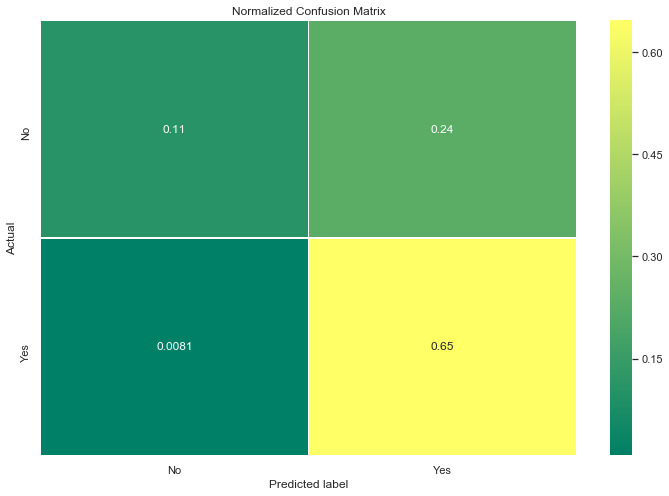

In [802]:
plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted label')
plt.title("Normalized Confusion Matrix")
plt.show()

In [807]:
from sklearn.linear_model import LogisticRegression

In [808]:
logReg = LogisticRegression()

In [809]:
logReg.fit(X_train,y_train.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [810]:
logReg_predict =logReg.predict(X_test)

In [811]:
accuracy_score(y_test,logReg_predict)

0.7967479674796748

In [812]:
pd.crosstab(y_test,logReg_predict, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,37,48
Y,2,159


In [813]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [814]:
DecTree = tree.DecisionTreeClassifier(max_depth=10,max_features=4 )

In [815]:
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [816]:
DecTree_pred = DecTree.predict(X_test)

In [817]:
X_test.columns

Index(['CoapplicantIncome', 'Credit_History', 'LoanAmount_log', 'Married_Yes',
       'Dependents_2', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [818]:
accuracy_score(y_test,DecTree_pred)

0.7276422764227642

In [819]:
pd.crosstab(y_test,DecTree_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,37,48
Y,19,142


In [820]:
import graphviz 

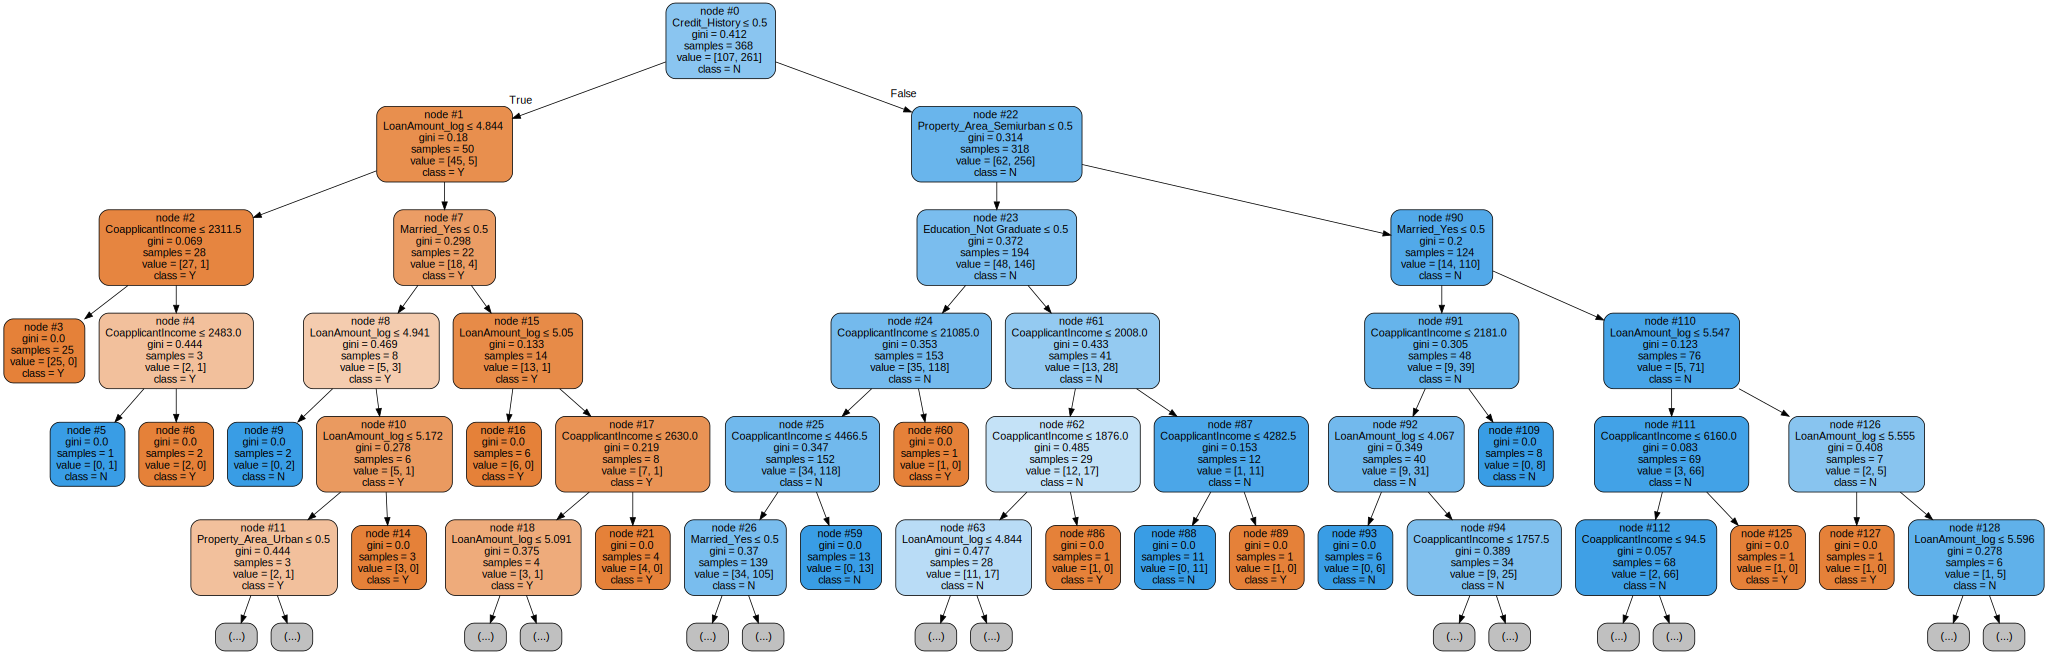

In [821]:
dot_data = tree.export_graphviz(DecTree, out_file=None, feature_names=chosen_cols,class_names=target['Loan_Status'], filled=True,
                                rounded=True,special_characters=True, label='all', max_depth=5,node_ids=True, rotate=False)  
graph = graphviz.Source(dot_data)  
graph 

In [822]:
dot_data = tree.export_graphviz(DecTree, out_file=None, feature_names=chosen_cols,class_names=target['Loan_Status'], filled=True,
                                rounded=True,special_characters=True, label='all', max_depth=5,node_ids=True, rotate=False) 
graph = graphviz.Source(dot_data) 
graph.render("DecTree_Model") 

'DecTree_Model.pdf'

In [823]:
from sklearn.neighbors import KNeighborsClassifier

In [824]:
knn = KNeighborsClassifier(n_neighbors =5)

In [825]:
knn.fit(X_train,y_train.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [826]:
KNN_pred = knn.predict(X_test)

In [827]:
accuracy_score(y_test,KNN_pred)

0.6544715447154471

In [828]:
pd.crosstab(y_test,KNN_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,17,68
Y,17,144


In [829]:
print('KNN : ',accuracy_score(y_test,KNN_pred)  )
print('Decision Tree: ', accuracy_score(y_test,DecTree_pred))
print('Log_Reg: ', accuracy_score(y_test,logReg_predict))
print('R_Forest: ',accuracy_score(y_test,y_pred_RF))

KNN :  0.6544715447154471
Decision Tree:  0.7276422764227642
Log_Reg:  0.7967479674796748
R_Forest:  0.7560975609756098


# CROSS VALIDATION 

In [888]:
validation_size = 0.40
seed = 7
scoring = 'accuracy'

In [889]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, 
                                                                                random_state=seed)


In [890]:
models = []
models.append(('LR_cv', LogisticRegression()))
models.append(('KNN_cv', KNeighborsClassifier()))
models.append(('RF_cv', RandomForestClassifier()))
models.append(('DT_cv', DecisionTreeClassifier()))

In [891]:
results = []
names = []
for name, model in models:
       
    kfold = model_selection.KFold(n_splits=10, random_state=seed)

    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR_cv: 0.815315 (0.061169)
KNN_cv: 0.706381 (0.062169)
RF_cv: 0.722598 (0.049433)
DT_cv: 0.700751 (0.064581)


In [892]:
LR_cv = LogisticRegression()
LR_cv.fit(X_train, Y_train)

LR_cv_pred = LR_cv.predict(X_validation)
print(accuracy_score(Y_validation, LR_cv_pred))
print(confusion_matrix(Y_validation, LR_cv_pred))
print(classification_report(Y_validation, LR_cv_pred))

0.8089430894308943
[[ 35  45]
 [  2 164]]
             precision    recall  f1-score   support

          N       0.95      0.44      0.60        80
          Y       0.78      0.99      0.87       166

avg / total       0.84      0.81      0.78       246



In [893]:
# print( LR_cv.predict_proba(X_validation))

In [894]:
pd.crosstab(Y_validation,LR_cv_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,35,45
Y,2,164


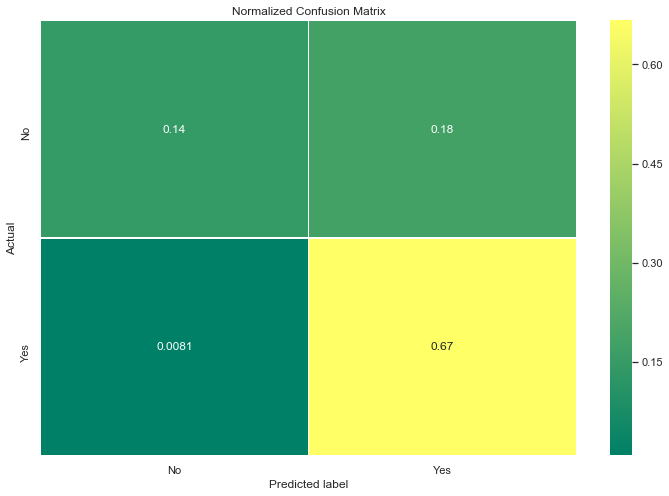

In [895]:
conf_m = confusion_matrix(Y_validation, LR_cv_pred)
cf_mat_p = conf_m/conf_m.sum()

plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted label')
plt.title("Normalized Confusion Matrix")
plt.show()

In [896]:
RF_cv = RandomForestClassifier()
RF_cv.fit(X_train, Y_train)

RF_cv_pred = RF_cv.predict(X_validation)
print(accuracy_score(Y_validation, RF_cv_pred))
print(confusion_matrix(Y_validation, RF_cv_pred))
print(classification_report(Y_validation, RF_cv_pred))

0.7073170731707317
[[ 46  34]
 [ 38 128]]
             precision    recall  f1-score   support

          N       0.55      0.57      0.56        80
          Y       0.79      0.77      0.78       166

avg / total       0.71      0.71      0.71       246



In [897]:
pd.crosstab(Y_validation,RF_cv_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,46,34
Y,38,128


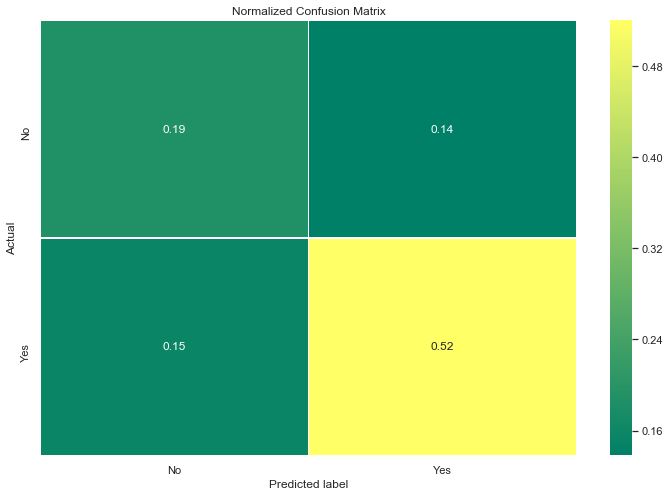

In [898]:
conf_m = confusion_matrix(Y_validation, RF_cv_pred)
cf_mat_p = conf_m/conf_m.sum()

plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted label')
plt.title("Normalized Confusion Matrix")
plt.show()

# Using the Best Model (Logistic Regression) to Predict New Applicant Data

In [899]:
testData = pd.read_csv('New Loan Applicants.csv')

In [900]:
testData.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [901]:
testData.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [902]:
testData.Gender.fillna("Male",inplace =True)
testData.Gender.isnull().sum()

0

In [903]:
testData.Married.fillna("Yes",inplace=True)
testData.Credit_History.fillna(1.0,inplace=True)
testData.LoanAmount.fillna(testData.LoanAmount.mean(),inplace=True)
testData.Loan_Amount_Term.fillna(testData.Loan_Amount_Term.mean(),inplace=True)
testData.Self_Employed.fillna("No",inplace=True)
testData.Dependents.fillna(0,inplace=True)

In [904]:
testDataNew = pd.get_dummies(testData, columns = ['Gender', 'Married', 'Dependents',
                                    'Education', 'Self_Employed', 'Property_Area'], drop_first= True)

In [905]:
testDataNew['LoanAmount_log10'] = np.log10(testDataNew['LoanAmount'])

In [906]:
testDataNew.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_log10
0,LP001015,5720,0,110.0,360.0,1.0,1,1,1,0,0,0,0,0,0,1,2.041393
1,LP001022,3076,1500,126.0,360.0,1.0,1,1,0,1,0,0,0,0,0,1,2.100371


In [907]:
testDataNew.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'LoanAmount_log10'],
      dtype='object')

In [908]:
feature_columns = ['CoapplicantIncome',
 'Credit_History',
 'LoanAmount_log10',
 'Married_Yes',
 'Dependents_2',
 'Education_Not Graduate',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [909]:
feature_columns

['CoapplicantIncome',
 'Credit_History',
 'LoanAmount_log10',
 'Married_Yes',
 'Dependents_2',
 'Education_Not Graduate',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [910]:
New_App = testDataNew[feature_columns]

In [911]:
New_App.head(2)

,CoapplicantIncome,Credit_History,LoanAmount_log10,Married_Yes,Dependents_2,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0,1.0,2.041393,1,0,0,0,1
1,1500,1.0,2.100371,1,0,0,0,1


In [912]:
New_App_Score = LR_cv.predict(New_App)

In [913]:
New_App_Score

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [914]:
##Store the final result in a csv file to be passed to decision makers to use.

pd.DataFrame({'Loan_ID':testDataNew.Loan_ID,'Loan_Status':New_App_Score}).to_csv('Result.csv',index=False)

In [915]:
Ne = pd.DataFrame({'Loan_ID':testDataNew.Loan_ID,'Loan_Status':New_App_Score})

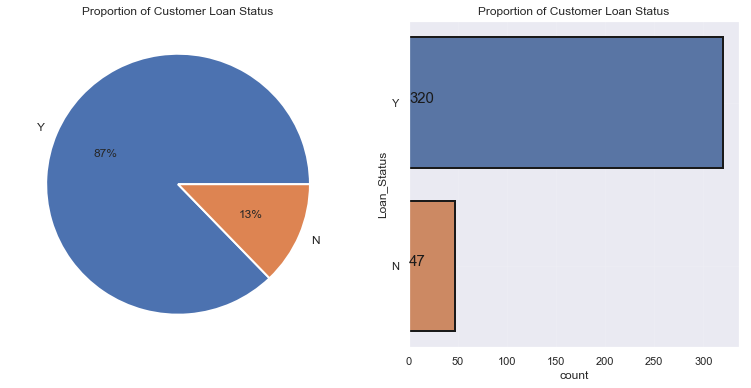

In [916]:
plt.figure(figsize=(13,6))
plt.subplot(121)
Ne["Loan_Status"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 12,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Proportion of Customer Loan Status")
plt.ylabel("")

plt.subplot(122)
ax = sns.countplot(y = Ne["Loan_Status"],linewidth = 2,
                   edgecolor = "k"*Ne["Loan_Status"].nunique())
for i,j in enumerate(Ne["Loan_Status"].value_counts().values) : 
    ax.text(.1,i,j,fontsize = 15,color = "k")
plt.title("Proportion of Customer Loan Status")
plt.grid(True,alpha = .1)
    
plt.show()